In [1]:
# Data source: https://sbn.psi.edu/pds/archive/physical.html
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# loading filepath
folder_path = "EAR_A_5_DDR_ASTEROID_DENSITIES_V1_1\EAR_A_5_DDR_ASTEROID_DENSITIES_V1_1\data"

filepath = folder_path + "\density.tab"

In [3]:
# reading file into pandas DataFrame
df = pd.read_table(filepath, delimiter=" ", header=None, 
                   engine='python')

In [4]:
# Parsing dataframe
ceres = df.drop(range(14, 67));
ceres = ceres.drop(range(0, 5), axis=1)
ceres = ceres.drop(range(7, 27), axis=1)
ceres = ceres.drop(28, axis=1)
ceres = ceres.drop(range(43,46), axis=1)

In [5]:
# Adding labels from density.lbl
ceres_columns = {5: 'AST_NUM', 6: 'AST_NAME', 27: 'TAX_TYPE', 
                 29: 'M_SOL_SOURCE', 30: 'M_SOL', 31: 'M_SOL_UNC_SOURCE', 
                32: 'M_SOL_UNCERTAINTY', 33: 'M_KG_SOURCE', 34: 'M_KG', 
                35: 'M_KG_UNC_SOURCE', 36: 'M_KG_UPPER_UNC', 
                 37: 'M_KG_LOWER_UNC', 38: 'DIAMETER', 39: 'DIAMETER_UNC', 
                40: 'BULK_DENSITY', 41: 'BD_UPPER_UNC', 42: 'BD_LOWER_UNC', 
                }
ceres = ceres.rename(columns=ceres_columns)

# creating new field to map indivdual numbers against
ceres['OBV_NUM'] = pd.Series(np.arange(len(ceres['AST_NUM'])))

In [6]:
ceres_mass = ceres.drop(1)
ceres_mass = ceres_mass.drop(range(12,14))
ceres_mass

,AST_NUM,AST_NAME,TAX_TYPE,M_SOL_SOURCE,M_SOL,M_SOL_UNC_SOURCE,M_SOL_UNCERTAINTY,M_KG_SOURCE,M_KG,M_KG_UNC_SOURCE,M_KG_UPPER_UNC,M_KG_LOWER_UNC,DIAMETER,DIAMETER_UNC,BULK_DENSITY,BD_UPPER_UNC,BD_LOWER_UNC,OBV_NUM
0,1,Ceres,G,0.0,4.762000e-10,0.0,1.500000e-12,0.0,9.470000e+20,1.0,2.980000e+18,2.980000e+18,-99.99,-9.99,2.12,0.04,0.04,0
2,1,Ceres,G,0.0,4.700000e-10,0.0,4.000000e-12,0.0,9.350000e+20,1.0,7.960000e+18,7.960000e+18,-99.99,-9.99,-0.99,-0.99,-0.99,2
3,1,Ceres,G,0.0,4.390000e-10,0.0,4.000000e-12,0.0,8.730000e+20,1.0,7.960000e+18,7.960000e+18,-99.99,-9.99,-0.99,-0.99,-0.99,3
4,1,Ceres,G,0.0,4.700000e-10,2.0,-9.900000e+98,0.0,9.350000e+20,2.0,-9.900000e+98,-9.900000e+98,-99.99,-9.99,-0.99,-0.99,-0.99,4
5,1,Ceres,G,0.0,4.759000e-10,0.0,2.300000e-12,0.0,9.470000e+20,1.0,4.570000e+18,4.570000e+18,-99.99,-9.99,-0.99,-0.99,-0.99,5
6,1,Ceres,G,0.0,5.000000e-10,0.0,2.000000e-11,0.0,9.900000e+20,1.0,3.980000e+19,3.980000e+19,-99.99,-9.99,-0.99,-0.99,-0.99,6
7,1,Ceres,G,1.0,5.178000e-10,2.0,-9.900000e+98,0.0,1.030000e+21,2.0,-9.900000e+98,-9.900000e+98,-99.99,-9.99,-0.99,-0.99,-0.99,7
8,1,Ceres,G,0.0,4.740000e-10,0.0,3.000000e-11,0.0,9.400000e+20,1.0,5.970000e+19,5.970000e+19,-99.99,-9.99,-0.99,-0.99,-0.99,8
9,1,Ceres,G,0.0,5.000000e-10,0.0,2.000000e-11,0.0,9.900000e+20,1.0,3.980000e+19,3.980000e+19,-99.99,-9.99,-0.99,-0.99,-0.99,9
10,1,Ceres,G,0.0,5.210000e-10,0.0,3.000000e-11,0.0,1.030000e+21,1.0,5.970000e+19,5.970000e+19,-99.99,-9.99,-0.99,-0.99,-0.99,10


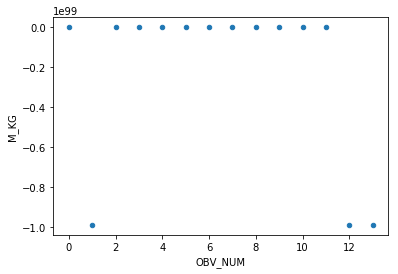

In [7]:
ceres.plot(kind='scatter', x='OBV_NUM', y='M_KG')
plt.show()

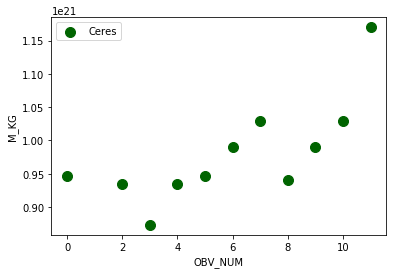

In [10]:
ceres_mass.plot(kind='scatter', label='Ceres', color='DarkGreen',
                x='OBV_NUM', y='M_KG', s=100)
plt.show()

ceres_mass_avg = ceres_mass['M_KG'].mean()
ceres_mass_avg

In [34]:
pallas = df.drop(range(0, 14))
pallas = pallas.drop(range(25, 67))
pallas = pallas.drop(range(0, 5), axis=1)
pallas = pallas.drop(range(7, 26), axis=1)
pallas = pallas.drop(27, axis=1)
pallas = pallas.drop(35, axis=1)
pallas = pallas.drop(range(42, 46), axis=1)

In [44]:
pallas_columns = {5: 'AST_NUM', 6: 'AST_NAME', 26: 'TAX_TYPE', 
                 28: 'M_SOL_SOURCE', 29: 'M_SOL', 30: 'M_SOL_UNC_SOURCE', 
                31: 'M_SOL_UNCERTAINTY', 32: 'M_KG_SOURCE', 33: 'M_KG', 
                34: 'M_KG_UNC_SOURCE', 36: 'M_KG_UPPER_UNC', 
                37: 'DIAMETER', 38: 'DIAMETER_UNC', 
                39: 'BULK_DENSITY', 40: 'BD_UPPER_UNC', 41: 'BD_LOWER_UNC'}
pallas = pallas.rename(columns=pallas_columns)

In [47]:
pallas['OBV_NUM'] = np.arange(len(pallas['AST_NUM']))

In [52]:
pallas['M_KG']

14    2.140000e+20
15   -9.900000e+98
16    2.330000e+20
17    2.410000e+20
18    3.160000e+20
19    2.140000e+20
20    2.800000e+20
21    2.100000e+20
22   -9.900000e+98
23   -9.900000e+98
24   -9.900000e+98
Name: M_KG, dtype: float64

In [62]:
pallas_mass = pallas.drop(15)
pallas_mass = pallas_mass.drop(range(22, 25))

In [64]:
pallas_mass_avg = pallas_mass['M_KG'].mean()
pallas_mass_avg

2.44e+20